## Fix `feature_selection` plots

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('moodify', path = data_real_path)

In [3]:
dataset.name

'moodify'

In [10]:
def fix_feat_sel_plot(dataset,model,interpretation,scenario,save=True,box_loc=None,rotation=False):
    path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    path_plots=os.path.join(experiment_path,dataset.name,'plots_new')
    plot_feature_selection(file_path,plot_path=path_plots,model=model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=True,box_loc=box_loc,rotation=rotation)

In [ ]:
fix_feat_sel_plot(dataset,'EIF+','EXIFFI',2,save=False)

## Fix `AUC_FS` box

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [2]:
os.chdir('../experiments/results')
models=['EIF','IF','EIF+']
interpretations=['RandomForest']
scenarios=[1,2]
dataset_names_syn=['Xaxis','Yaxis','bisect','bisect_3d','bisect_6d']
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
dataset_names_real=['moodify']
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'

Synthetic Datasets

In [3]:
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

Real Datasets

In [ ]:
for data in dataset_names_real:
    dataset = Dataset(data, path = data_real_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [5]:
aucfs_vals=[]
for model in models:
    for interpretation in interpretations:
        if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
            continue
        elif (model=='IF') and (interpretation=='EXIFFI'):
            continue
        else:
            for scenario in scenarios:
                aucfs_vals.append(get_fs_file(dataset,model,interpretation,scenario).aucfs)

`cardio`

In [6]:
dataset = Dataset('ionosphere', path = data_real_path)

In [7]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`diabetes` and `shuttle`

In [16]:
dataset = Dataset('shuttle', path = data_real_path)

In [15]:
fix_fs_file(dataset,'EIF+','RandomForest',2)
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`moodify`

In [5]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

## `contamination` plots

In [11]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [12]:
def fix_contamination_plot(dataset,model,interpretation,scenario,save=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','contamination','precisions')
    file_path=get_most_recent_file(path)
    prec=open_element(file_path)[0]
    path_plots=os.path.join(experiment_path,dataset.name,'plots_new')
    plot_precision_over_contamination(prec,dataset.name,model,interpretation,scenario,path_plots,save_image=save,plot_image=True)

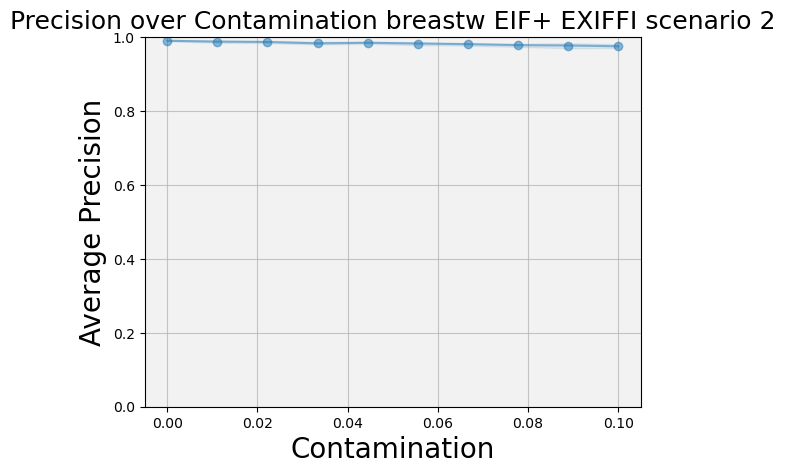

In [8]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('breastw', path = data_real_path)
fix_contamination_plot(dataset,'EIF+','EXIFFI',2)

In [ ]:
fix_contamination_plot(dataset,'EIF+','EXIFFI',2)

`plot_feature_selection`

In [8]:
def print_plt_title(dataset_name,model,interpretation,scenario):
    t = time.localtime()
    current_time = time.strftime("%d-%m-%Y_%H-%M-%S", t)
    namefile = "/" + current_time + "_" + dataset_name + "_" + model + "_" + interpretation + "_feature_selection_" + str(scenario) + ".pdf"
    return namefile

In [9]:
print_plt_title('breastw','EIF+','EXIFFI',2)

'/28-02-2024_10-04-29_breastw_EIF+_EXIFFI_feature_selection_2.pdf'